In [1]:
import sys
import os
import typing as tp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parent  
base_data_dir = project_root / 'data'
data_dir = base_data_dir / 'processed'
plots_dir = project_root / 'results' / 'plots'

print(f"Data directory exists: {data_dir.exists()}")
print(f"Plots directory exists: {plots_dir.exists()}")

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Data directory exists: True
Plots directory exists: True


In [2]:
state_file = data_dir / 'state_variables.csv'
if state_file.exists():
    state_df = pd.read_csv(state_file)
    print(state_df.head())
else:
    print(f"State data not found at {state_file}")

   IndustryGrowth  LeaseLength  RSFOccupied  OccupancyRate  \
0        0.025830          5.0  2448.550839       0.653912   
1       -0.072727          5.0  1809.951624       0.888305   
2       -0.009860          7.0  1386.764369       0.747356   
3        0.000000         15.0  3520.418384       0.534051   
4        0.012195          5.0  2413.599103       0.604724   

   IncentivesAvailable  EconomicIndicator  VacancyRate  
0                  0.0                1.0         0.05  
1                  1.0                0.0         0.10  
2                  0.0                1.0         0.05  
3                  0.0                1.0         0.05  
4                  1.0                0.0         0.10  


In [3]:
leases_file = data_dir / 'leases_df.csv'

# Load the leases_df
if leases_file.exists():
    leases_df = pd.read_csv(leases_file)
    print(leases_df.head())
else:
    print(f"Lease data not found at {leases_file}")

   LeaseID  TenantID  StartYear  LeaseYear  FloorLevel SuiteID  \
0      1.0       1.0       1990       1990          20    20_1   
1      2.0       1.0       1990       1990          30    30_2   
2      3.0       1.0       1990       1990           6     6_3   
3      4.0       1.0       1990       1990           8     8_4   
4      5.0       1.0       1990       1990          15    15_5   

   SuiteSquareFootage  RentAmount  AnnualRent  Occupied  VacantSpace  
0         2905.312281        12.0    34863.75      True     17094.69  
1         2251.572843        12.0    27018.87      True     17748.43  
2         4989.611574        12.0    59875.34      True     15010.39  
3         3319.059610        12.0    39828.72      True     16680.94  
4         4578.801890        12.0    54945.62      True     15421.20  


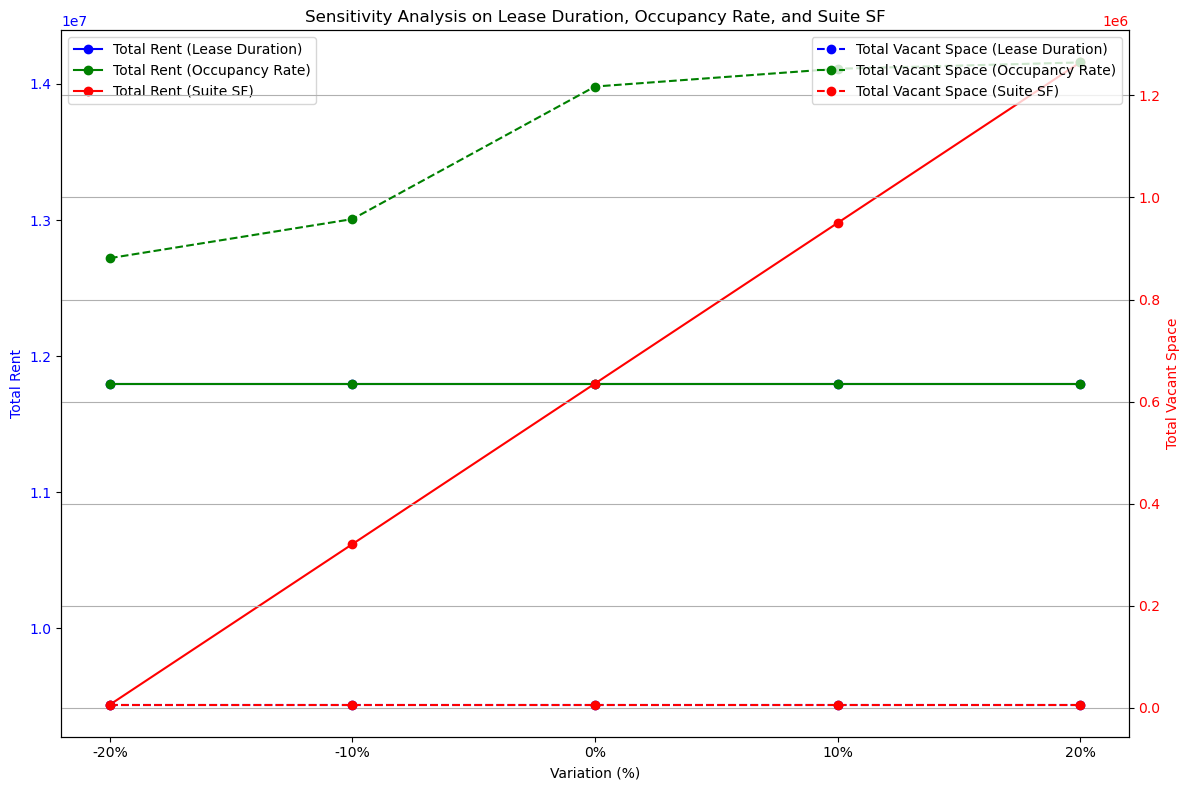

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# calculate total annual rent and vacancy rate
def calculate_metrics(df):
    total_rent = df['AnnualRent'].sum()
    total_vacant_space = df[df['Occupied'] == False]['VacantSpace'].sum()
    return total_rent, total_vacant_space

# Define variations for lease duration, occupancy rate, and suite square footage
variation_percentages = [-0.2, -0.1, 0, 0.1, 0.2]  # Vary by -20%, -10%, 0%, +10%, +20%

# Create a dictionary to store results
results = {
    'Variation': [],
    'Total Rent (Lease Duration)': [],
    'Total Vacant Space (Lease Duration)': [],
    'Total Rent (Occupancy Rate)': [],
    'Total Vacant Space (Occupancy Rate)': [],
    'Total Rent (Suite SF)': [],
    'Total Vacant Space (Suite SF)': []
}

# Loop over each variation
for variation in variation_percentages:
    # 1. Vary Lease Duration
    df_varied = leases_df.copy()
    df_varied['LeaseYear'] = df_varied['LeaseYear'] * (1 + variation)
    df_varied['AnnualRent'] = df_varied['RentAmount'] * df_varied['SuiteSquareFootage']
    total_rent, total_vacant_space = calculate_metrics(df_varied)
    results['Variation'].append(f'{int(variation * 100)}%')
    results['Total Rent (Lease Duration)'].append(total_rent)
    results['Total Vacant Space (Lease Duration)'].append(total_vacant_space)

    # 2. Vary Occupancy Rate
    df_varied = leases_df.copy()
    df_varied['Occupied'] = df_varied['Occupied'].apply(lambda x: False if np.random.rand() < (1 + variation) * 0.5 else x)
    total_rent, total_vacant_space = calculate_metrics(df_varied)
    results['Total Rent (Occupancy Rate)'].append(total_rent)
    results['Total Vacant Space (Occupancy Rate)'].append(total_vacant_space)

    # 3. Vary Suite Square Footage
    df_varied = leases_df.copy()
    df_varied['SuiteSquareFootage'] = df_varied['SuiteSquareFootage'] * (1 + variation)
    df_varied['AnnualRent'] = df_varied['RentAmount'] * df_varied['SuiteSquareFootage']
    total_rent, total_vacant_space = calculate_metrics(df_varied)
    results['Total Rent (Suite SF)'].append(total_rent)
    results['Total Vacant Space (Suite SF)'].append(total_vacant_space)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting the sensitivity analysis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot total rent for different factors
ax1.plot(results_df['Variation'], results_df['Total Rent (Lease Duration)'], 'b-o', label='Total Rent (Lease Duration)')
ax1.plot(results_df['Variation'], results_df['Total Rent (Occupancy Rate)'], 'g-o', label='Total Rent (Occupancy Rate)')
ax1.plot(results_df['Variation'], results_df['Total Rent (Suite SF)'], 'r-o', label='Total Rent (Suite SF)')
ax1.set_xlabel('Variation (%)')
ax1.set_ylabel('Total Rent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a twin y-axis to plot total vacant space
ax2 = ax1.twinx()
ax2.plot(results_df['Variation'], results_df['Total Vacant Space (Lease Duration)'], 'b--o', label='Total Vacant Space (Lease Duration)')
ax2.plot(results_df['Variation'], results_df['Total Vacant Space (Occupancy Rate)'], 'g--o', label='Total Vacant Space (Occupancy Rate)')
ax2.plot(results_df['Variation'], results_df['Total Vacant Space (Suite SF)'], 'r--o', label='Total Vacant Space (Suite SF)')
ax2.set_ylabel('Total Vacant Space', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Add title and grid
plt.title('Sensitivity Analysis on Lease Duration, Occupancy Rate, and Suite SF')
fig.tight_layout()
plt.grid(True)
plt.show()


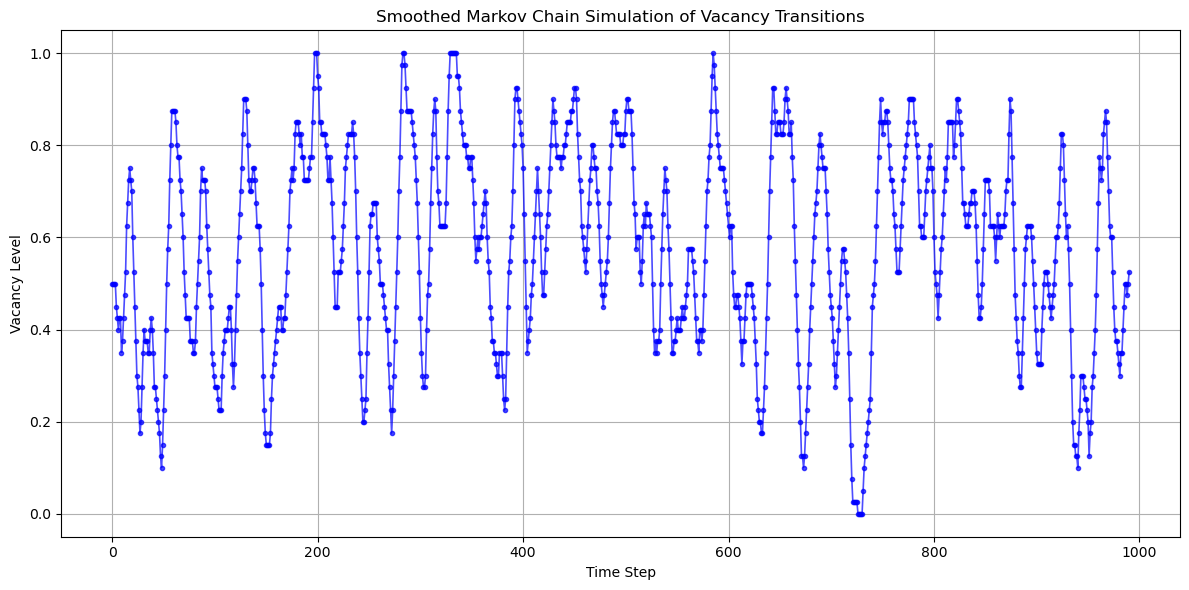

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define vacancy states with more granularity
vacancy_states = [0.0, 0.25, 0.5, 0.75, 1.0]  # Vacancy levels

# Transition probability matrix with a weighted inertia for staying in the current state
transition_matrix = np.array([
    [0.7, 0.2, 0.05, 0.03, 0.02],  # High probability to stay at 0% vacancy
    [0.1, 0.6, 0.2, 0.07, 0.03],   # 25% vacancy
    [0.05, 0.15, 0.5, 0.2, 0.1],   # 50% vacancy
    [0.02, 0.1, 0.2, 0.5, 0.18],   # 75% vacancy
    [0.01, 0.03, 0.05, 0.2, 0.71]  # High probability to stay at 100% vacancy
])

# Initial state
current_state = 2  # Start at 50% vacancy

# Number of time steps
num_time_steps = 1000

# Store the vacancy levels over time
vacancy_levels = []

# Simulate vacancy transitions
for _ in range(num_time_steps):
    vacancy_levels.append(vacancy_states[current_state])
    current_state = np.random.choice(
        len(vacancy_states),
        p=transition_matrix[current_state]
    )

# Apply a rolling mean for smoother transitions
window_size = 10  # Adjust for smoother visualization
smoothed_vacancy = np.convolve(vacancy_levels, np.ones(window_size)/window_size, mode='valid')

# Plot the improved Markov Chain simulation
plt.figure(figsize=(12, 6))
plt.plot(smoothed_vacancy, color='blue', lw=1.2, marker='o', markersize=3, alpha=0.7)
plt.xlabel('Time Step')
plt.ylabel('Vacancy Level')
plt.title('Smoothed Markov Chain Simulation of Vacancy Transitions')
plt.grid(True)
plt.tight_layout()
plt.show()


Bootstrapped Mean Vacant Space: 6127.49 sq ft
Bootstrapped Std Dev Vacant Space: 2294.40 sq ft


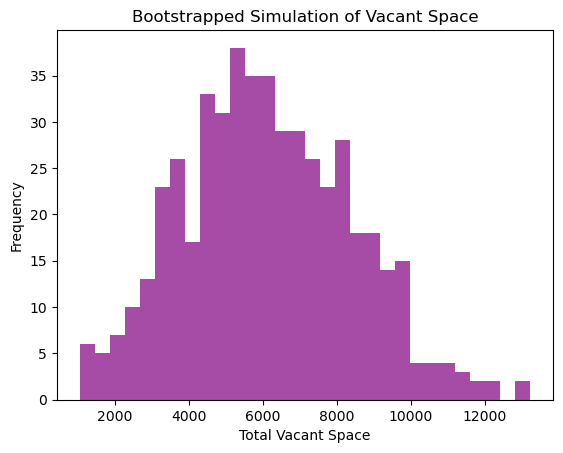

In [6]:
from sklearn.utils import resample

# Define number of bootstrap samples
num_bootstraps = 500

# Store results of vacant space for each bootstrap sample
bootstrap_results = []

for i in range(num_bootstraps):
    # Resample the leases_df to create a bootstrap sample
    bootstrap_sample = resample(leases_df)
    # Calculate total vacant space
    total_vacant_space = bootstrap_sample[bootstrap_sample['Occupied'] == False]['VacantSpace'].sum()
    bootstrap_results.append(total_vacant_space)

# Calculate mean and std of bootstrapped vacant space
mean_bootstrap_vacancy = np.mean(bootstrap_results)
std_bootstrap_vacancy = np.std(bootstrap_results)

print(f"Bootstrapped Mean Vacant Space: {mean_bootstrap_vacancy:.2f} sq ft")
print(f"Bootstrapped Std Dev Vacant Space: {std_bootstrap_vacancy:.2f} sq ft")

# Plot results
plt.hist(bootstrap_results, bins=30, color='purple', alpha=0.7)
plt.xlabel('Total Vacant Space')
plt.ylabel('Frequency')
plt.title('Bootstrapped Simulation of Vacant Space')
plt.show()


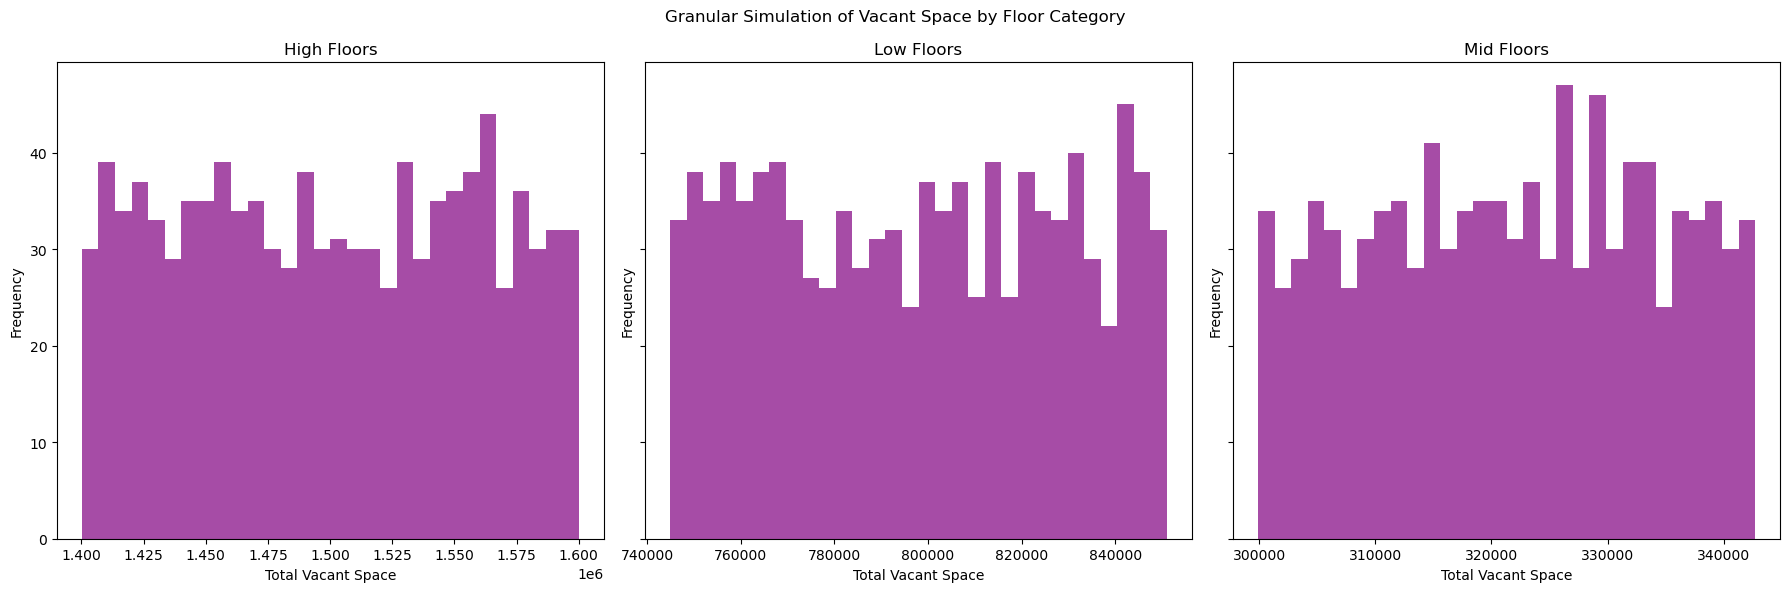

High Floors - Mean Vacant Space: 1499648.16 sq ft, Std Dev: 58106.81 sq ft
Low Floors - Mean Vacant Space: 797731.01 sq ft, Std Dev: 31351.96 sq ft
Mid Floors - Mean Vacant Space: 321656.88 sq ft, Std Dev: 12114.25 sq ft


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Group leases by floor level (e.g., low, mid, high)
def categorize_floor(floor_level):
    if floor_level <= 9:
        return 'Low'
    elif 10 <= floor_level <= 15:
        return 'Mid'
    else:
        return 'High'

leases_df['FloorCategory'] = leases_df['FloorLevel'].apply(categorize_floor)

# Define clusters for granular analysis
clusters = leases_df['FloorCategory'].unique()

# Parameters for granular simulation
num_simulations = 1000  # Number of iterations
granular_vacancy_projections = {cluster: [] for cluster in clusters}

# Simulate vacancies within each cluster
for cluster in clusters:
    cluster_data = leases_df[leases_df['FloorCategory'] == cluster]

    for i in range(num_simulations):
        # Random economic shock within each cluster
        shock_factor = np.random.uniform(0.05, 0.2)  # Shock ranging from 5% to 20%

        # Calculate vacancy rates after applying shock
        cluster_vacant_space = cluster_data['VacantSpace'] * (1 + shock_factor)
        granular_vacancy_projections[cluster].append(cluster_vacant_space.sum())

# Plot the distribution of vacant space for each cluster
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Granular Simulation of Vacant Space by Floor Category')

for idx, cluster in enumerate(clusters):
    axs[idx].hist(granular_vacancy_projections[cluster], bins=30, alpha=0.7, color='purple')
    axs[idx].set_title(f'{cluster} Floors')
    axs[idx].set_xlabel('Total Vacant Space')
    axs[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate mean and standard deviation for each cluster
for cluster in clusters:
    mean_vacancy = np.mean(granular_vacancy_projections[cluster])
    std_vacancy = np.std(granular_vacancy_projections[cluster])
    print(f'{cluster} Floors - Mean Vacant Space: {mean_vacancy:.2f} sq ft, Std Dev: {std_vacancy:.2f} sq ft')


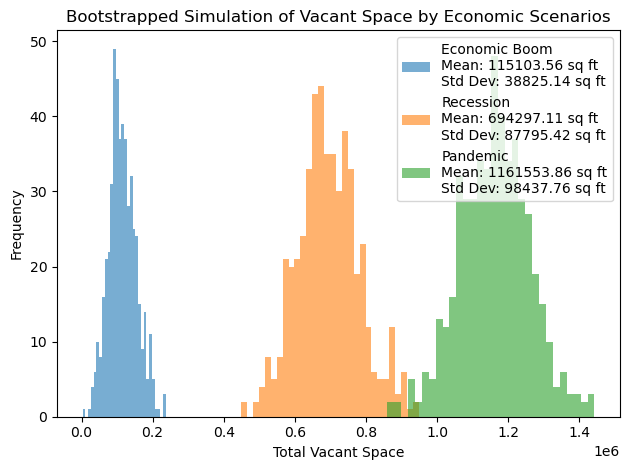

Economic Boom - Mean Vacant Space: 115103.56 sq ft, Std Dev: 38825.14 sq ft
Recession - Mean Vacant Space: 694297.11 sq ft, Std Dev: 87795.42 sq ft
Pandemic - Mean Vacant Space: 1161553.86 sq ft, Std Dev: 98437.76 sq ft


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define economic scenario parameters
scenarios = {
    'Economic Boom': {'rent_multiplier': 1.2, 'occupancy_rate': 0.95, 'lease_duration': 1.2},
    'Recession': {'rent_multiplier': 0.8, 'occupancy_rate': 0.7, 'lease_duration': 0.7},
    'Pandemic': {'rent_multiplier': 0.6, 'occupancy_rate': 0.5, 'lease_duration': 0.5}
}

# Initialize lists to store simulation results
bootstrapped_means = {}
bootstrapped_stds = {}

# Number of bootstraps
num_bootstraps = 500

# Iterate over each scenario
for scenario, params in scenarios.items():
    bootstrapped_vacant_space = []

    # Bootstrapped simulation for vacant space
    for i in range(num_bootstraps):
        # Sample lease data with replacement
        sample_df = leases_df.sample(frac=1, replace=True)

        # Adjust rent, occupancy, and lease duration based on the scenario
        sample_df['RentAmount'] *= params['rent_multiplier']
        sample_df['Occupied'] = np.random.rand(len(sample_df)) < params['occupancy_rate']
        sample_df['LeaseYear'] = sample_df['LeaseYear'] * params['lease_duration']

        # Calculate total vacant space
        total_vacant_space = sample_df[sample_df['Occupied'] == False]['VacantSpace'].sum()
        bootstrapped_vacant_space.append(total_vacant_space)

    # Calculate statistics for the scenario
    mean_vacant_space = np.mean(bootstrapped_vacant_space)
    std_vacant_space = np.std(bootstrapped_vacant_space)

    # Store the results
    bootstrapped_means[scenario] = mean_vacant_space
    bootstrapped_stds[scenario] = std_vacant_space

    # Plot the distribution
    plt.hist(bootstrapped_vacant_space, bins=30, alpha=0.6, label=f'{scenario}\nMean: {mean_vacant_space:.2f} sq ft\nStd Dev: {std_vacant_space:.2f} sq ft')

# Plotting the results
plt.xlabel('Total Vacant Space')
plt.ylabel('Frequency')
plt.title('Bootstrapped Simulation of Vacant Space by Economic Scenarios')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Display bootstrapped means and standard deviations for each scenario
for scenario in scenarios:
    print(f"{scenario} - Mean Vacant Space: {bootstrapped_means[scenario]:.2f} sq ft, Std Dev: {bootstrapped_stds[scenario]:.2f} sq ft")
